In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression #machine learning
from sklearn.model_selection import train_test_split 


In [73]:
file_path = "iris.csv"

In [74]:
data = pd.read_csv(file_path)
data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [75]:
data["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [76]:
missing_values = data.isnull().sum()
missing_percentage =  (missing_values / len(data)) * 100

print("Missing Values: ",missing_values)
print("Missing values by percentage: ", missing_percentage)


Missing Values:  sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64
Missing values by percentage:  sepal_length    0.0
sepal_width     0.0
petal_length    0.0
petal_width     0.0
species         0.0
dtype: float64


In [77]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [78]:
data["petal_width"].min()

np.float64(0.1)

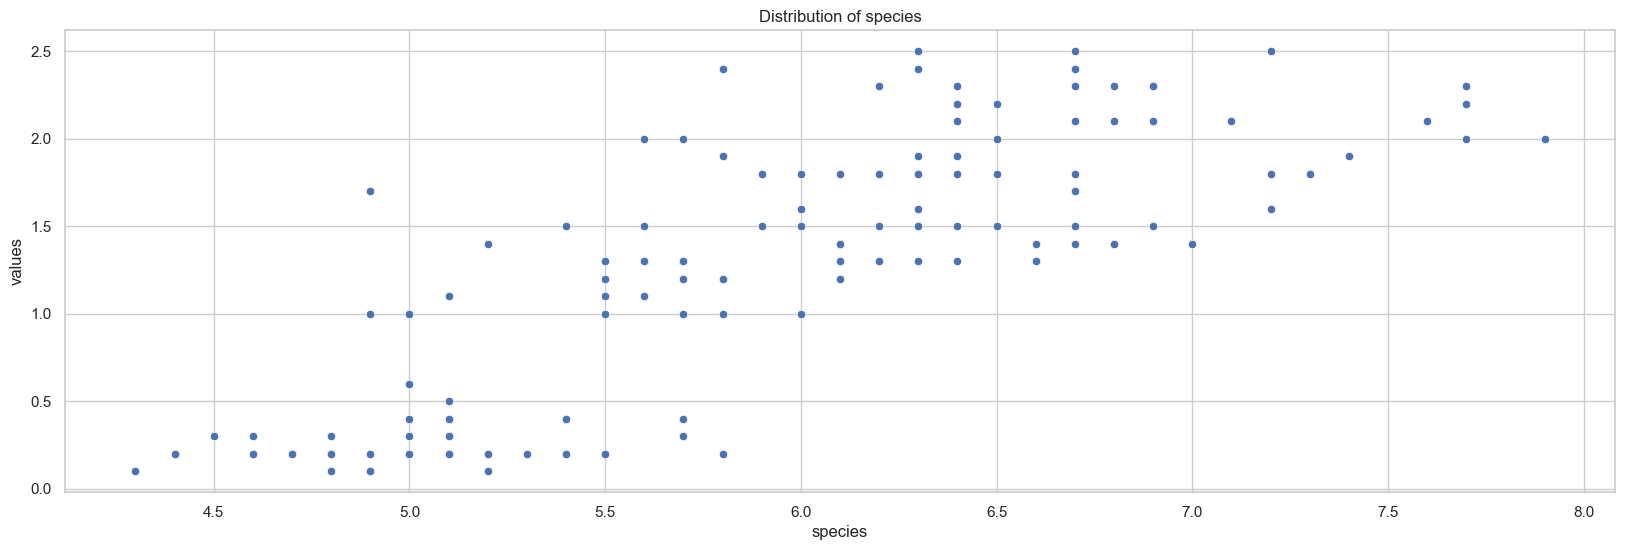

In [79]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(20,6))
sns.scatterplot(data=data, x='sepal_length', y='petal_width')
plt.title('Distribution of species')
plt.xlabel('species')
plt.ylabel('values')
plt.show()

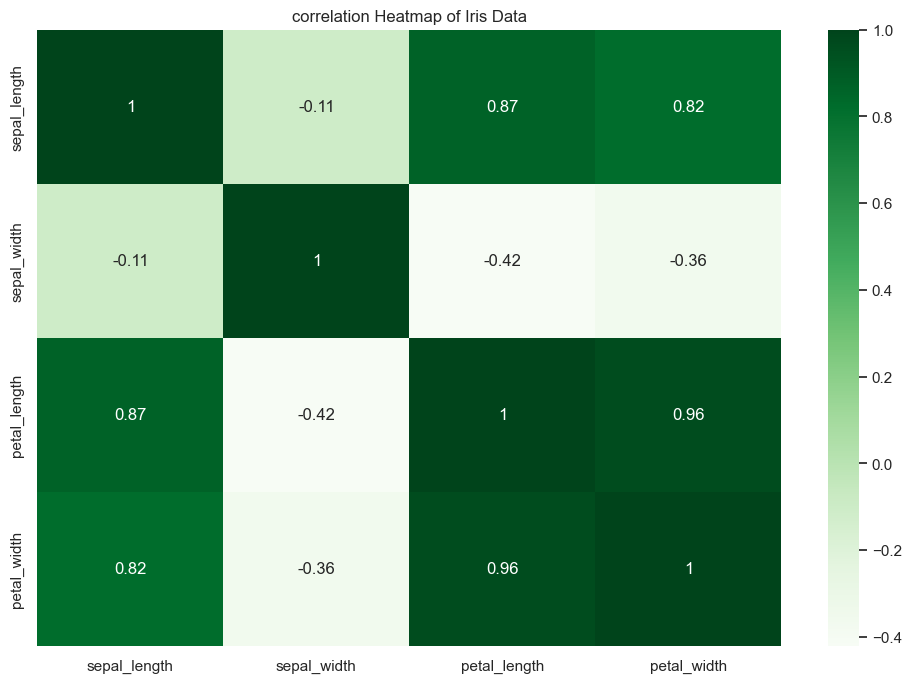

In [80]:
plt.figure(figsize=(12,8))
#data.select_dtypes(include=['number']) specifies to select only numerical to avoid conflict with string datatypes while plotting heatmaps
sns.heatmap(data.select_dtypes(include=['number']).corr(),annot=True,cmap='Greens')
plt.title('correlation Heatmap of Iris Data')
plt.show()


In [81]:
label_encoder = LabelEncoder()
data['species'] = label_encoder.fit_transform(data['species'])

In [82]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [83]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
target = ['species']

x,y = data[features], data[target]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1111)

model = LogisticRegression(max_iter=200)
model_fit = model.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [84]:
test_predictions = model_fit.predict(X_test)

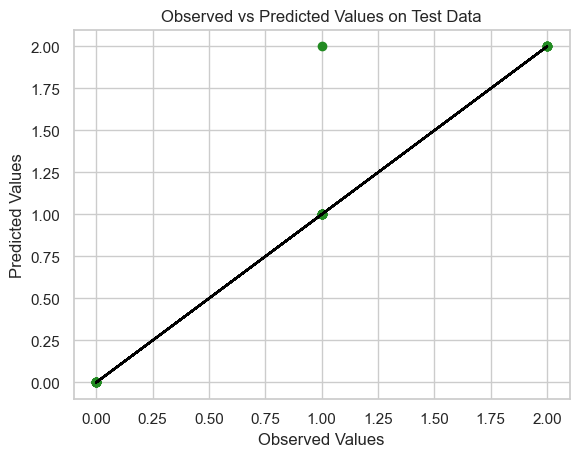

In [85]:
# Scatter plot for observed vs predicted values on test data
plt.scatter(y_test, test_predictions, color='forestgreen')
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('Observed vs Predicted Values on Test Data')
plt.plot(y_test, y_test, color='black') # line for perfect prediction (true values)
plt.show()

In [88]:
y_test_species = y_test['species']
comparison = pd.DataFrame({'Actual': y_test_species, 'Predicted': test_predictions})
print(comparison)


     Actual  Predicted
49        0          0
122       2          2
12        0          0
70        1          2
100       2          2
72        1          1
36        0          0
99        1          1
90        1          1
79        1          1
92        1          1
142       2          2
33        0          0
84        1          1
128       2          2
4         0          0
65        1          1
82        1          1
19        0          0
120       2          2
95        1          1
41        0          0
59        1          1
27        0          0
16        0          0
6         0          0
3         0          0
145       2          2
56        1          1
58        1          1


Accuracy:96.67
